In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import numpy as np

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
with open('./data/R_square_values_w_1_root_2.txt', 'r') as file:
    R_square_values_w_1_root_2 = [float(line.strip()) for line in file]

with open('./data/R_square_values_w_random_10p.txt', 'r') as file:
    R_square_values_w_random_10p = [float(line.strip()) for line in file]

with open('./data/R_square_values_w_random_20p.txt', 'r') as file:
    R_square_values_w_random_20p = [float(line.strip()) for line in file]
    
with open('./data/R_square_values_base_line.txt', 'r') as file:
    R_square_values_base_line = [float(line.strip()) for line in file]


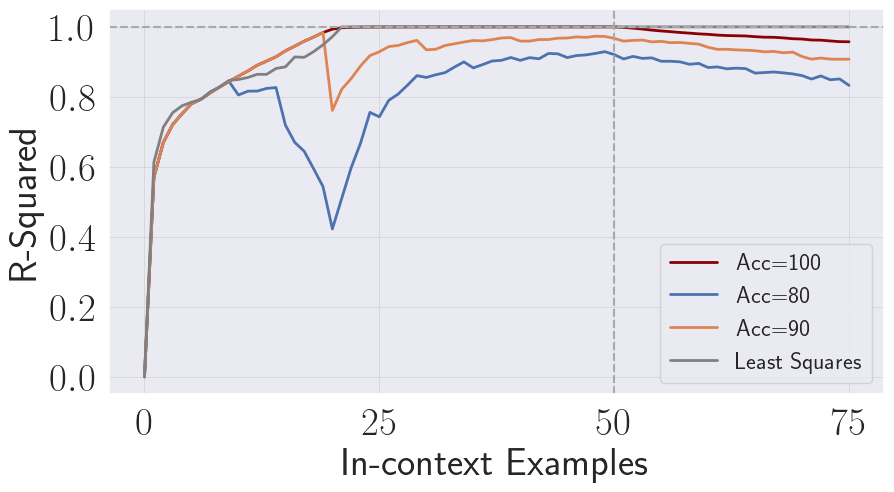

In [7]:
prompt_length = 76
matplotlib.rcParams['text.usetex'] = True
plt.figure(figsize=(10, 5), facecolor='none')
plt.plot(range(prompt_length), R_square_values_w_1_root_2[:prompt_length], label="Acc=100%", linewidth=2, color="darkred")
plt.plot(range(prompt_length), R_square_values_w_random_20p[:prompt_length], label="Acc=80%", linewidth=2)
plt.plot(range(prompt_length), R_square_values_w_random_10p[:prompt_length], label="Acc=90%", linewidth=2)
plt.plot(range(prompt_length), R_square_values_base_line[:prompt_length], label="Least Squares", linewidth=2, color="grey")
x = [0, 25, 50, 75]
plt.xticks(x, fontsize=28)
plt.yticks(fontsize=28)
plt.axhline(1, ls="--", color="darkgrey")
plt.axvline(x=50, color='darkgrey', linestyle='--')  # Grey vertical line
plt.legend(loc='lower right', fontsize=17)
plt.xlabel('In-context Examples', fontsize=28)
plt.ylabel('R-Squared', fontsize=28)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.savefig("../output/4_2.pdf", bbox_inches = "tight", transparent=True)
plt.show()